In [33]:
import pandas as pd

# read in files
energy_df = pd.read_csv('/content/FE_hourly.csv').set_index('Datetime')
stock_df = pd.read_csv('/content/FE.csv').set_index('Date')

# showing energy Dataset
energy_df

,FE_MW
Datetime,
2011-12-31 01:00:00,6222.0
2011-12-31 02:00:00,5973.0
2011-12-31 03:00:00,5778.0
2011-12-31 04:00:00,5707.0
2011-12-31 05:00:00,5691.0
...,...
2018-01-01 20:00:00,9378.0
2018-01-01 21:00:00,9255.0
2018-01-01 22:00:00,9044.0


In [34]:
# showing stock Dataset
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-11-10,25.750000,25.750000,25.125000,25.187500,9.159575,947200
1997-11-11,25.187500,25.437500,25.125000,25.312500,9.205033,514700
1997-11-12,25.250000,25.875000,25.125000,25.625000,9.318677,344700
1997-11-13,25.562500,25.937500,25.562500,25.875000,9.409593,1007700
1997-11-14,25.875000,26.000000,25.687500,26.000000,9.455042,1394900
...,...,...,...,...,...,...
2020-03-26,35.470001,39.270000,35.419998,38.669998,38.669998,4915500
2020-03-27,37.360001,40.330002,37.110001,38.599998,38.599998,5803000
2020-03-30,39.189999,40.910000,38.310001,40.490002,40.490002,6295900


In [35]:
# dropping adjusted close
stock_df = stock_df.drop(columns = 'Adj Close')

In [36]:
# checking index type
stock_df.index

Index(['1997-11-10', '1997-11-11', '1997-11-12', '1997-11-13', '1997-11-14',
       '1997-11-17', '1997-11-18', '1997-11-19', '1997-11-20', '1997-11-21',
       ...
       '2020-03-19', '2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31', '2020-04-01'],
      dtype='object', name='Date', length=5634)

In [37]:
# checking stock types
stock_df.dtypes

,0
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64


In [38]:
# resampling data to concat
energy_df.index = pd.to_datetime(energy_df.index)
energy_df = energy_df.resample('D').sum()
energy_df

,FE_MW
Datetime,
2011-06-01,208083.0
2011-06-02,185818.0
2011-06-03,176788.0
2011-06-04,180699.0
2011-06-05,188311.0
...,...
2018-07-30,193863.0
2018-07-31,195607.0
2018-08-01,196392.0


In [39]:
# changing index into datetime
stock_df.index = pd.to_datetime(stock_df.index)
#stock_df

In [41]:
# concatting data and also dropping empty values because stock market isn't opened for the weekends
combined_df = energy_df.merge(stock_df, how = 'left', left_index = True, right_index = True).dropna()
combined_df

,FE_MW,Open,High,Low,Close,Volume
Datetime,,,,,,
2011-06-01,208083.0,44.540001,44.560001,44.000000,44.000000,2890500.0
2011-06-02,185818.0,44.110001,44.119999,43.529999,43.730000,3100400.0
2011-06-03,176788.0,43.450001,43.759998,42.930000,43.669998,5242800.0
2011-06-06,210942.0,43.540001,43.630001,43.119999,43.330002,1864000.0
2011-06-07,223043.0,43.480000,43.900002,43.349998,43.360001,1986900.0
...,...,...,...,...,...,...
2018-07-30,193863.0,34.810001,35.000000,34.730000,34.900002,4592900.0
2018-07-31,195607.0,35.070000,35.520000,34.980000,35.430000,5607400.0
2018-08-01,196392.0,35.900002,36.560001,35.369999,36.459999,7429900.0


In [42]:
# getting our target value
combined_df['Next Day Open'] = combined_df['Open'].shift(-1)
combined_df['Next Day Open'].iloc[[7, -1]] = stock_df.loc['2018-08-06', 'Open']

combined_df['Timestamp'] = [date.timestamp() for date in combined_df.index]
combined_df

,FE_MW,Open,High,Low,Close,Volume,Next Day Open,Timestamp
Datetime,,,,,,,,
2011-06-01,208083.0,44.540001,44.560001,44.000000,44.000000,2890500.0,44.110001,1.306886e+09
2011-06-02,185818.0,44.110001,44.119999,43.529999,43.730000,3100400.0,43.450001,1.306973e+09
2011-06-03,176788.0,43.450001,43.759998,42.930000,43.669998,5242800.0,43.540001,1.307059e+09
2011-06-06,210942.0,43.540001,43.630001,43.119999,43.330002,1864000.0,43.480000,1.307318e+09
2011-06-07,223043.0,43.480000,43.900002,43.349998,43.360001,1986900.0,43.439999,1.307405e+09
...,...,...,...,...,...,...,...,...
2018-07-30,193863.0,34.810001,35.000000,34.730000,34.900002,4592900.0,35.070000,1.532909e+09
2018-07-31,195607.0,35.070000,35.520000,34.980000,35.430000,5607400.0,35.900002,1.532995e+09
2018-08-01,196392.0,35.900002,36.560001,35.369999,36.459999,7429900.0,36.400002,1.533082e+09


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# seperate into targets and features

y_train = combined_df['Next Day Open'].iloc[:1407]
y_test = combined_df['Next Day Open'].iloc[1407:]
X_train = combined_df.reset_index().drop(columns = ['Next Day Open', 'Datetime']).iloc[:1407]
X_test = combined_df.reset_index().drop(columns = ['Next Day Open', 'Datetime']).iloc[1407:]

In [44]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [45]:
import keras
from keras import layers

model = keras.Sequential()

model.add(layers.Input((7,)))

model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(64, activation = 'relu'))

model.add(layers.Dense(1))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss = 'mean_squared_error', optimizer = keras.optimizers.Adam(learning_rate = 0.01))

In [47]:
fit_model = model.fit(
    X_train_scaled,
    y_train,
    epochs = 100,
    validation_split = .2,
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 843.4818 - val_loss: 44.8934
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63.6731 - val_loss: 33.1715
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.2806 - val_loss: 23.1360
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.2779 - val_loss: 11.4398
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8073 - val_loss: 6.8569
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2928 - val_loss: 5.3108
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7900 - val_loss: 5.3120
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5406 - val_loss: 4.4354
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3841 - val_loss: 3.8008
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3658 - val_loss: 2.6769
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2294 - val_loss: 2.4230
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

In [52]:
model.evaluate(X_test_scaled, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2259 


7.127958297729492

In [66]:
train_predictions = model.predict(X_train_scaled)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [61]:
predictions = model.predict(X_test_scaled)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: >

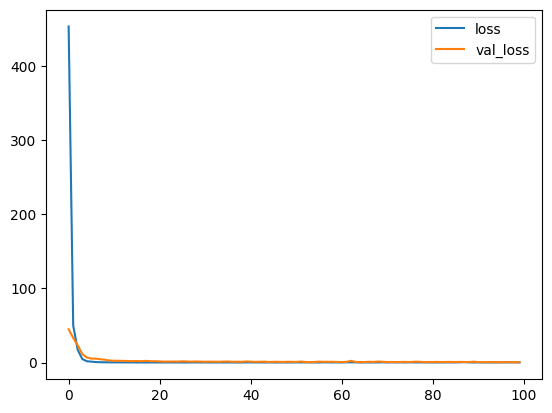

In [58]:
history_df = pd.DataFrame(fit_model.history)


<Axes: >

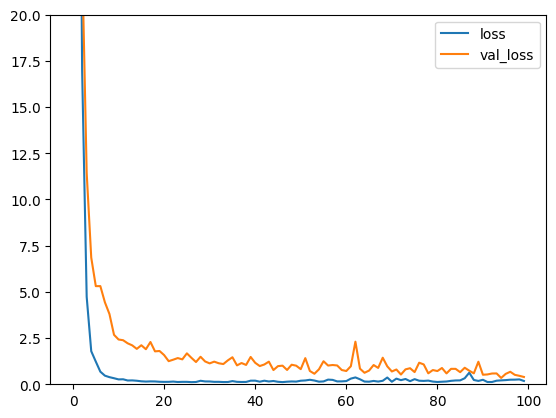

In [59]:
history_df.plot(ylim=(0,20))

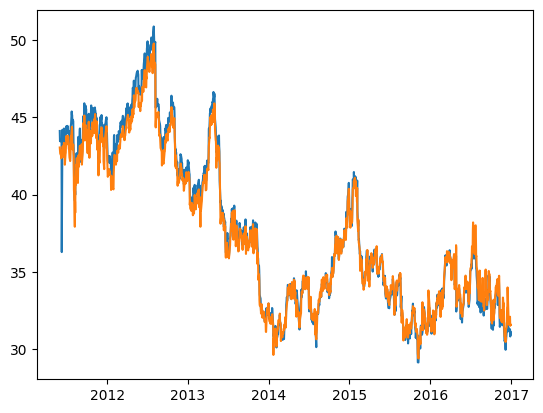

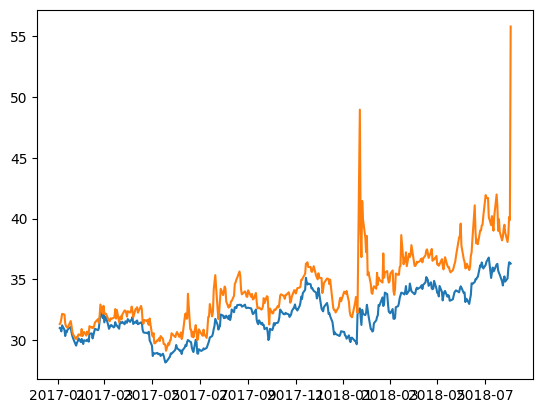

In [68]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(combined_df.iloc[:1407].index,y_train)
ax.plot(combined_df.iloc[:1407].index,train_predictions)

fig, ax2 = plt.subplots()
ax2.plot(combined_df.iloc[1407:].index,y_test)
ax2.plot(combined_df.iloc[1407:].index,predictions)
plt.show()